In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.io import wavfile
from scipy import signal
from scipy.signal import periodogram as periodogram_f
from scipy.fft import fftfreq, fftshift
from scipy.fft import fft, ifft, fft2, ifft2
plt.style.use(['science', 'notebook'])

In [11]:
#this code creates a "signal", looking like a FFT
f = np.linspace(-2.5, 2.5, 1000)
A = np.zeros(1000)
A[(f>-1.85)*(f<-1.8)] = 1
A[(f>-1)*(f<-0.95)] = 1/3
A[(f>-0.3)*(f<-0.2)] = 0.5
A[(f>0.1)*(f<0.2)] = 1.4
A[(f>1.5)*(f<1.6)] = 0.2

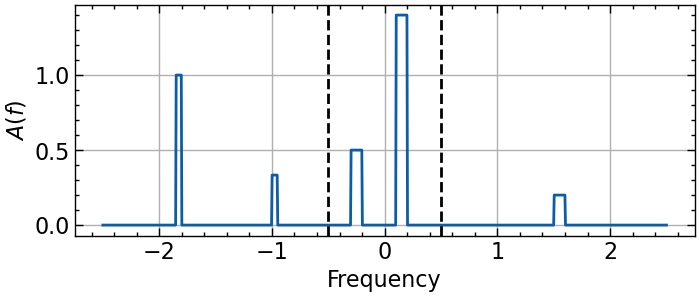

In [12]:
plt.figure(figsize=(8,3))
plt.plot(f,A)
plt.axvline(-0.5, color='k', ls='--')
plt.axvline(0.5, color='k', ls='--')
plt.xlabel('Frequency')
plt.ylabel('$A(f)$')
plt.grid()
plt.show()

In [7]:
A_prime = np.stack([sum(np.split(A, [200,400,600,800]))]*5).ravel()

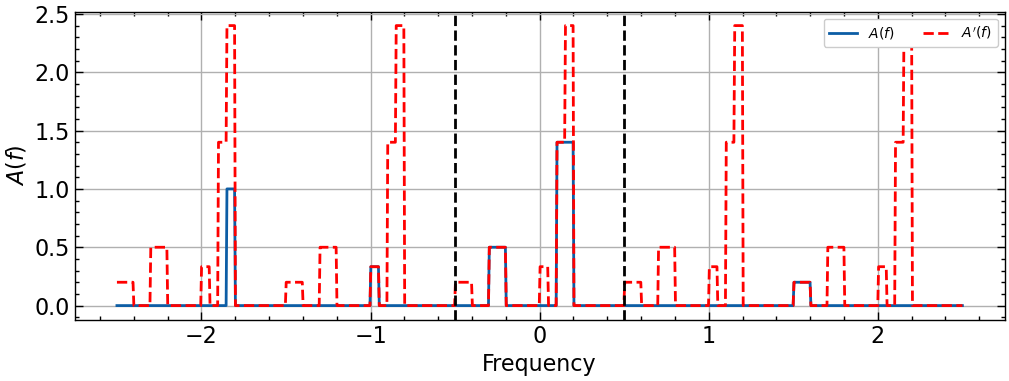

In [8]:
plt.figure(figsize=(12,4))
plt.plot(f,A, label='$A(f)$')
plt.plot(f,A_prime, color='r', ls='--', label="$A'(f)$")
plt.axvline(-0.5, color='k', ls='--')
plt.axvline(0.5, color='k', ls='--')
plt.xlabel('Frequency')
plt.ylabel('$A(f)$')
plt.legend(ncol=3, fontsize=10, facecolor='white', framealpha=1, frameon=True, loc='upper right')
plt.grid()
plt.show()

In [14]:
#rate is sampling rate in this case
rate, data = sp.io.wavfile.read('../Coding_Project/guitar_notes.wav')
data=data[:,0]
time = np.arange(0, len(data), 1)/rate

In [36]:
cutoffs = np.array([4.55, 6.3, 9.65, 12.3, 12.8, 14.9,
                    18.3, 19.8, 21.5, 23.7, 24.25, 27,
                    27.85, 30, 36.2, 39, 40.5, 43])*1e5
cutoffs = cutoffs.astype(int)

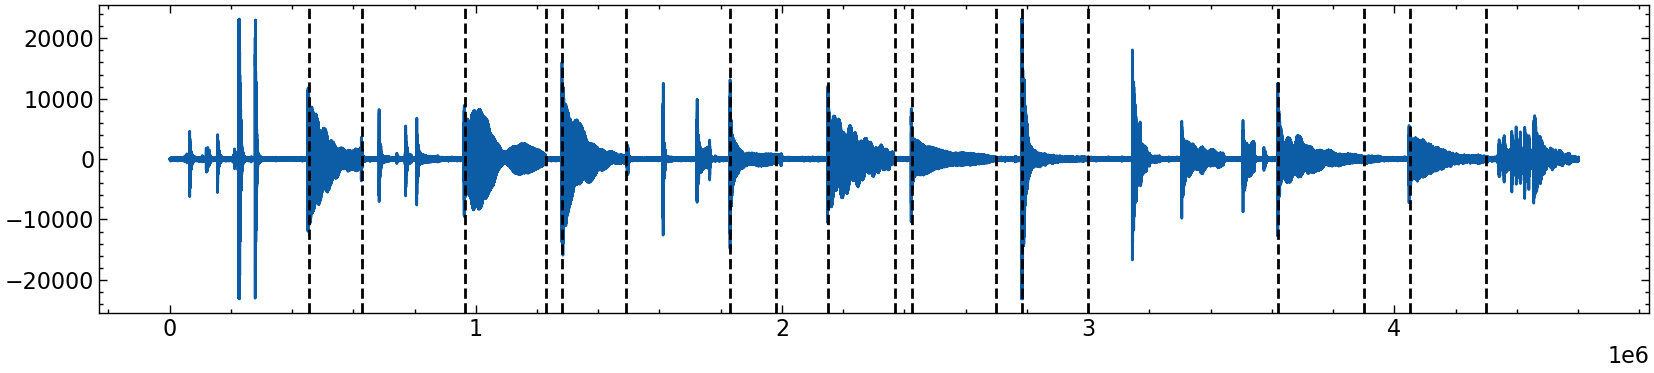

In [16]:
plt.figure(figsize=(20,4))
plt.plot(data)
[plt.axvline(cutoff, color='k', ls='--') for cutoff in cutoffs]
plt.show()

In [38]:
note_names = ['E', 'E_mute', 'A', 'A_mute', 'D', 'D_mute', 'G', 'B', 'E_h']
notes = [data[c1:c2] for (c1, c2) in zip(cutoffs[::2], cutoffs[1::2])]
note_dict = dict(zip(note_names, notes))

In [59]:
notes = [data[c1:c2] for (c1, c2) in zip(cutoffs[::2], cutoffs[1::2])]

In [60]:
notes

[array([6438, 6510, 6544, ..., -257, -264, -263], dtype=int16),
 array([4199, 4342, 4485, ...,  -42,  -44,  -48], dtype=int16),
 array([ 6, -1, -7, ..., 50, 55, 60], dtype=int16),
 array([-5138, -5099, -5587, ...,    68,    62,    55], dtype=int16),
 array([  473,  -470, -1260, ...,   -18,   -15,   -12], dtype=int16),
 array([3053, 3131, 3220, ...,   92,   91,   89], dtype=int16),
 array([-17848, -18590, -19371, ...,     89,     81,     75], dtype=int16),
 array([1901, 2122, 2342, ...,  -14,    8,   30], dtype=int16),
 array([1868, 1848, 1895, ..., -169, -180, -154], dtype=int16)]

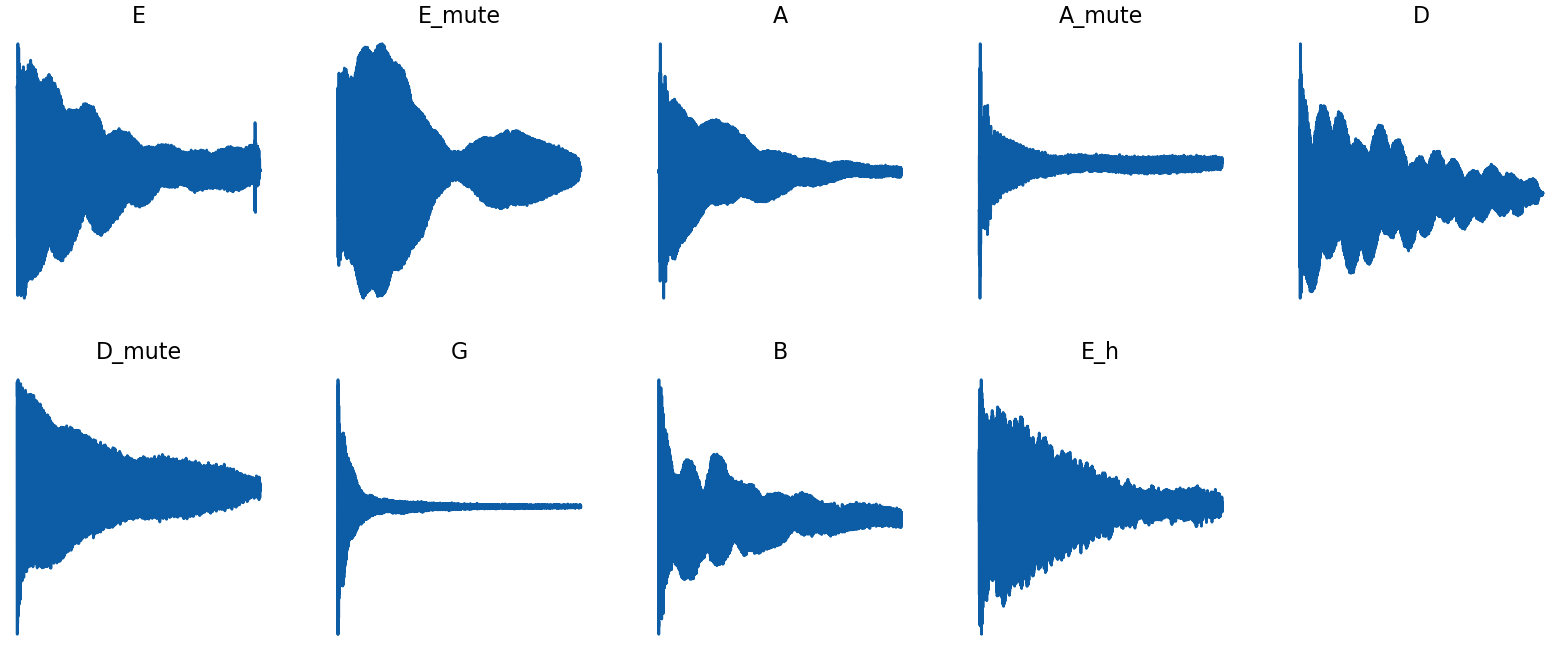

In [18]:
fig, ax = plt.subplots(2,5,figsize=(20,8))
for i in range(len(notes)):
    a = ax.ravel()[i]
    a.plot(note_dict[note_names[i]])
    a.set_title(note_names[i])
[a.set_axis_off() for a in ax.ravel()]
plt.show()

In [19]:
periodogram = np.abs(fft(note_dict['E']))**2 / (rate * len(note_dict['E']))
frequencies = fftfreq(len(note_dict['E']), d=1/rate)
E_fund = 81.2

In [20]:
frequencies

array([ 0.        ,  0.27428571,  0.54857143, ..., -0.82285714,
       -0.54857143, -0.27428571])

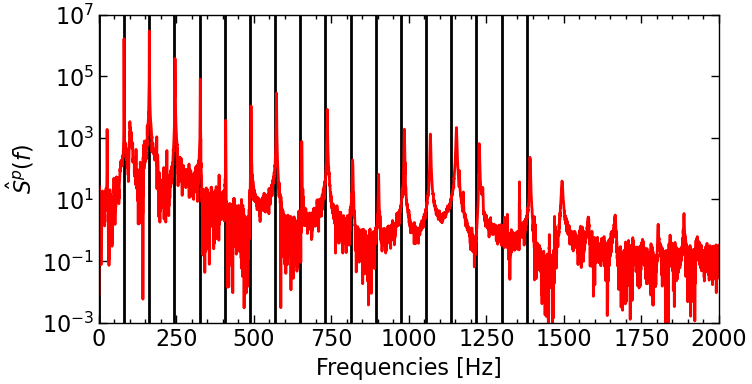

In [21]:
plt.figure(figsize=(8,4))
[plt.axvline(E_fund*i, color='k') for i in range(18)]
plt.plot(fftshift(frequencies), fftshift(periodogram), color='r')
plt.xlim(0,2000)
plt.ylim(bottom=1e-3, top=1e7)
plt.xlabel('Frequencies [Hz]')
plt.ylabel('$\hat{S}^{p}(f)$')
plt.semilogy()
plt.show()

In [22]:
frequencies, periodogram = periodogram_f(note_dict['E'], fs=rate)

[]

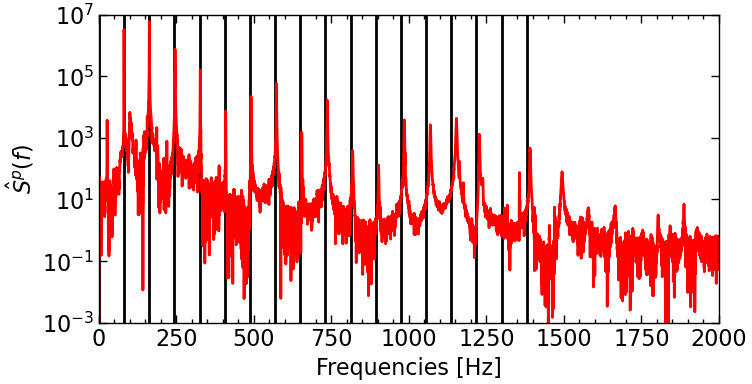

In [23]:
plt.figure(figsize=(8,4))
[plt.axvline(E_fund*i, color='k') for i in range(18)]
plt.plot(fftshift(frequencies), fftshift(periodogram), color='r')
plt.xlim(0,2000)
plt.ylim(bottom=1e-3, top=1e7)
plt.xlabel('Frequencies [Hz]')
plt.ylabel('$\hat{S}^{p}(f)$')
plt.semilogy()

In [24]:
f, P = periodogram_f(note_dict['E_mute'], fs=rate)

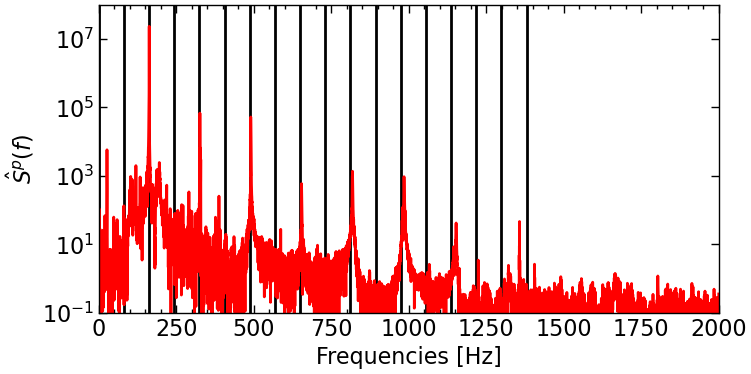

In [25]:
plt.figure(figsize=(8,4))
[plt.axvline(E_fund*i, color='k') for i in range(18)]
plt.plot(f, P, color='r')
plt.xlim(0,2000)
plt.ylim(bottom=1e-1, top=1e8)
plt.xlabel('Frequencies [Hz]')
plt.ylabel('$\hat{S}^{p}(f)$')
plt.semilogy()
plt.show()

In [26]:
P_smoothed = np.convolve(P, np.ones(5)/5, mode='same')

[]

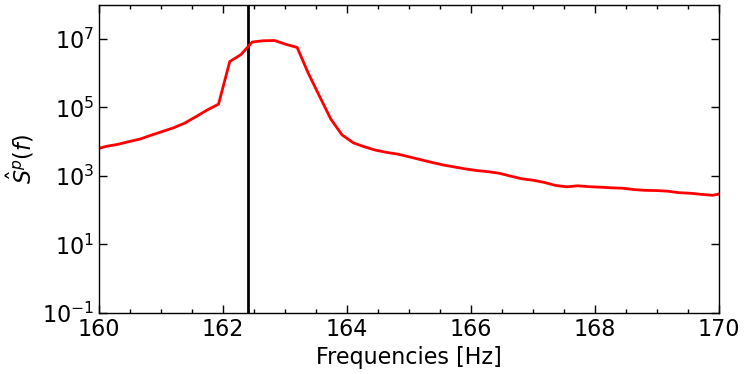

In [27]:
plt.figure(figsize=(8,4))
[plt.axvline(E_fund*i, color='k') for i in range(18)]
plt.plot(f, P_smoothed, color='r')
plt.xlim(0,2000)
plt.xlim(160,170)
plt.ylim(bottom=1e-1, top=1e8)
plt.xlabel('Frequencies [Hz]')
plt.ylabel('$\hat{S}^{p}(f)$')
plt.semilogy()

In [28]:
#decay of harmonic power over time

def compute_periodograms(ts, n=10):
    T = int(len(ts)/n)
    Ps = []
    time_of_Ps = []
    for i in range(n):
        f, P = periodogram_f(ts[i*T:(i+1)*T], fs=rate)
        time_of_Ps.append((i+0.5)*T/ rate) 
        Ps.append(P)
    
    return np.array(time_of_Ps),Ps,f

In [29]:
def extract_peaks(Ps, f, harmonic_freqs, eps=1, A=100):
    harmonic_amplitudes = []
    for P in Ps:
        amplitudes = []
        for freq in harmonic_freqs:
            P_range = P[(f>(freq-eps))*(f<(freq+eps))]
            amplitude = sum(P_range[P_range>max(P_range)/A])
            amplitudes.append(amplitude)
        harmonic_amplitudes.append(amplitudes)
    return np.array(harmonic_amplitudes)

In [30]:
time_of_Ps, Ps, f = compute_periodograms(note_dict['E'])


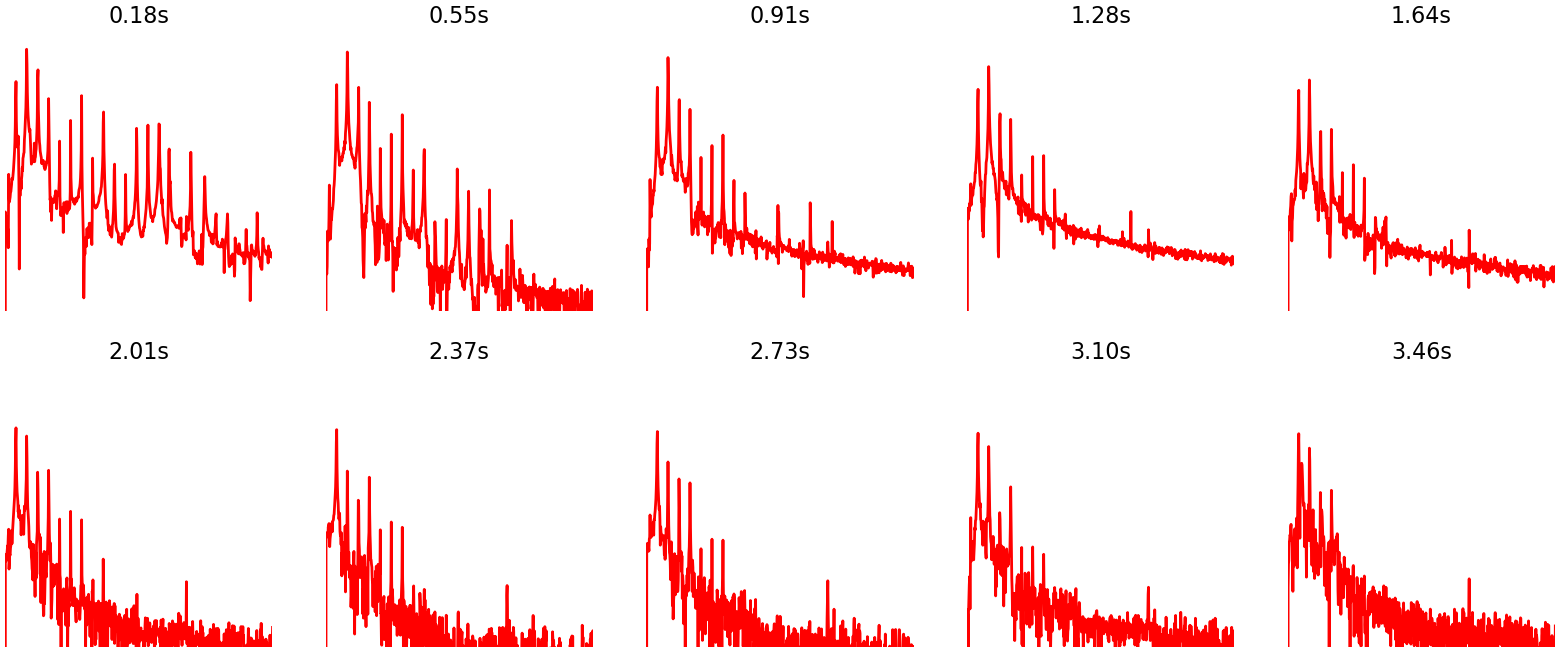

In [31]:
fig, ax = plt.subplots(2,5,figsize=(20,8))
for i, a in enumerate(ax.ravel()):
    a.plot(f, Ps[i], color='r')
    a.set_xlim(0,2000)
    a.set_ylim(bottom=1e-1, top=1e7)
    a.set_title(f'{time_of_Ps[i]:.2f}s')
    a.semilogy()
    a.set_axis_off()
plt.show()


In [33]:
harmonic_fundamental = E_fund
time_of_Ps, Ps, f = compute_periodograms(note_dict['E_mute'], n=15)
fourier_amp = extract_peaks(Ps, f, np.arange(1,10)*harmonic_fundamental, eps=8)

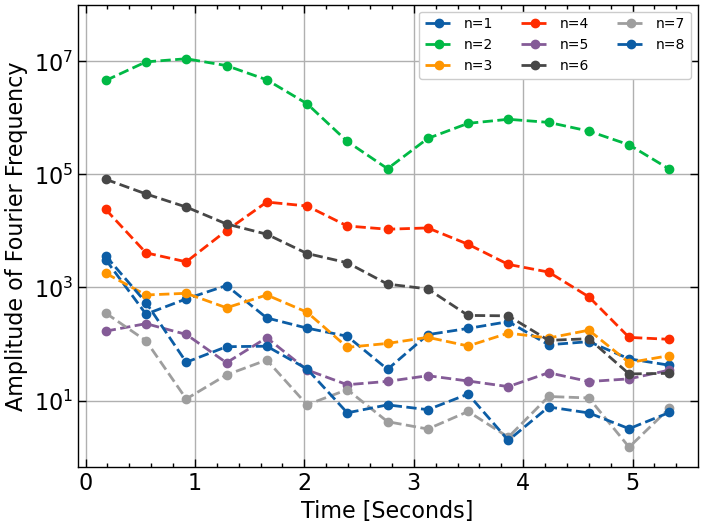

In [34]:
plt.plot(time_of_Ps, fourier_amp[:,0], 'o--', label='n=1')
plt.plot(time_of_Ps, fourier_amp[:,1], 'o--', label='n=2')
plt.plot(time_of_Ps, fourier_amp[:,2], 'o--', label='n=3')
plt.plot(time_of_Ps, fourier_amp[:,3], 'o--', label='n=4')
plt.plot(time_of_Ps, fourier_amp[:,4], 'o--', label='n=5')
plt.plot(time_of_Ps, fourier_amp[:,5], 'o--', label='n=6')
plt.plot(time_of_Ps, fourier_amp[:,6], 'o--', label='n=7')
plt.plot(time_of_Ps, fourier_amp[:,7], 'o--', label='n=8')
plt.xlabel('Time [Seconds]')
plt.ylabel('Amplitude of Fourier Frequency')
plt.grid()
plt.semilogy()
plt.ylim(top=1e8)
plt.legend(ncol=3, fontsize=10, facecolor='white', framealpha=1, frameon=True, loc='upper right')
plt.show()